In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [36]:
df=pd.read_csv(r"C:\Users\R\Downloads\12 Practical Machine Learning_\Cases\Real Estate/Housing.csv")
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [37]:
X=df.iloc[:,1:]
y =df.iloc[:,0]

In [38]:
X

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,yes,no,yes,no,no,1,no
1,4000,2,1,1,yes,no,no,no,no,0,no
2,3060,3,1,1,yes,no,no,no,no,0,no
3,6650,3,1,2,yes,yes,no,no,no,0,no
4,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,yes,yes,no,no,yes,0,no
542,6000,3,2,4,yes,no,no,no,yes,0,no
543,6000,3,2,4,yes,yes,no,no,yes,1,no
544,6000,3,2,2,yes,yes,no,no,yes,1,no


In [39]:
y

0       42000.0
1       38500.0
2       49500.0
3       60500.0
4       61000.0
         ...   
541     91500.0
542     94000.0
543    103000.0
544    105000.0
545    105000.0
Name: price, Length: 546, dtype: float64

In [40]:
X=pd.get_dummies(X,drop_first=True)

In [41]:
X

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,5850,3,1,2,1,1,0,1,0,0,0
1,4000,2,1,1,0,1,0,0,0,0,0
2,3060,3,1,1,0,1,0,0,0,0,0
3,6650,3,1,2,0,1,1,0,0,0,0
4,6360,2,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,0,1,1,0,0,1,0
542,6000,3,2,4,0,1,0,0,0,1,0
543,6000,3,2,4,1,1,1,0,0,1,0
544,6000,3,2,2,1,1,1,0,0,1,0


In [42]:
X=X.values
y=y.values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2022)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scalerx=MinMaxScaler()
scalery=MinMaxScaler()
X_train = scalerx.fit_transform(X_train)
y_train = scalery.fit_transform(y_train.reshape(-1,1))

In [44]:
X_test = scalerx.transform(X_test)
y_test = scalery.transform(y_test.reshape(-1,1))

In [45]:
tf.random.set_seed(2022)
model=tf.keras.models.Sequential([
                tf.keras.layers.Dense(8,activation="relu",input_shape=(X_train.shape[1],)),
                                 tf.keras.layers.Dense(6,activation="relu"),
                                 tf.keras.layers.Dense(3,activation="relu"),
                                 tf.keras.layers.Dense(1,activation="relu")
                                  ])

In [46]:
model.compile(optimizer="sgd",loss="mean_squared_error",metrics=["mae"])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=2, mode='auto',
        restore_best_weights=True)
history2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
12/12 - 1s - loss: 0.0272 - mae: 0.1214 - val_loss: 0.0230 - val_mae: 0.1131 - 1s/epoch - 104ms/step
Epoch 2/500
12/12 - 0s - loss: 0.0258 - mae: 0.1186 - val_loss: 0.0221 - val_mae: 0.1111 - 105ms/epoch - 9ms/step
Epoch 3/500
12/12 - 0s - loss: 0.0250 - mae: 0.1173 - val_loss: 0.0216 - val_mae: 0.1097 - 107ms/epoch - 9ms/step
Epoch 4/500
12/12 - 0s - loss: 0.0244 - mae: 0.1159 - val_loss: 0.0211 - val_mae: 0.1085 - 109ms/epoch - 9ms/step
Epoch 5/500
12/12 - 0s - loss: 0.0240 - mae: 0.1146 - val_loss: 0.0206 - val_mae: 0.1073 - 100ms/epoch - 8ms/step
Epoch 6/500
12/12 - 0s - loss: 0.0235 - mae: 0.1135 - val_loss: 0.0202 - val_mae: 0.1062 - 118ms/epoch - 10ms/step
Epoch 7/500
12/12 - 0s - loss: 0.0232 - mae: 0.1125 - val_loss: 0.0199 - val_mae: 0.1052 - 106ms/epoch - 9ms/step
Epoch 8/500
12/12 - 0s - loss: 0.0228 - mae: 0.1116 - val_loss: 0.0196 - val_mae: 0.1043 - 112ms/epoch - 9ms/step
Epoch 9/500
12/12 - 0s - loss: 0.0225 - mae: 0.1106 - val_loss: 0.0193 - val_mae: 0.1034

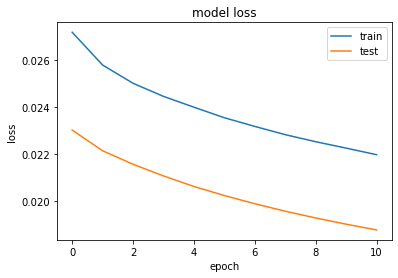

In [48]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [49]:
from sklearn.metrics import r2_score
R2 = r2_score(y_true=y_test,y_pred=y_pred)
print(f"R2: {R2}")

R2: 0.5598972960063936


In [50]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=500)

Epoch 1/500
12/12 - 0s - loss: 0.0258 - mae: 0.1188 - val_loss: 0.0221 - val_mae: 0.1111 - 179ms/epoch - 15ms/step
Epoch 2/500
12/12 - 0s - loss: 0.0250 - mae: 0.1172 - val_loss: 0.0216 - val_mae: 0.1098 - 110ms/epoch - 9ms/step
Epoch 3/500
12/12 - 0s - loss: 0.0244 - mae: 0.1160 - val_loss: 0.0211 - val_mae: 0.1085 - 103ms/epoch - 9ms/step
Epoch 4/500
12/12 - 0s - loss: 0.0240 - mae: 0.1146 - val_loss: 0.0206 - val_mae: 0.1073 - 113ms/epoch - 9ms/step
Epoch 5/500
12/12 - 0s - loss: 0.0236 - mae: 0.1134 - val_loss: 0.0202 - val_mae: 0.1062 - 106ms/epoch - 9ms/step
Epoch 6/500
12/12 - 0s - loss: 0.0232 - mae: 0.1125 - val_loss: 0.0199 - val_mae: 0.1052 - 105ms/epoch - 9ms/step
Epoch 7/500
12/12 - 0s - loss: 0.0228 - mae: 0.1115 - val_loss: 0.0196 - val_mae: 0.1042 - 107ms/epoch - 9ms/step
Epoch 8/500
12/12 - 0s - loss: 0.0225 - mae: 0.1107 - val_loss: 0.0193 - val_mae: 0.1033 - 150ms/epoch - 13ms/step
Epoch 9/500
12/12 - 0s - loss: 0.0222 - mae: 0.1099 - val_loss: 0.0190 - val_mae: 0.10

Epoch 73/500
12/12 - 0s - loss: 0.0167 - mae: 0.0942 - val_loss: 0.0143 - val_mae: 0.0893 - 96ms/epoch - 8ms/step
Epoch 74/500
12/12 - 0s - loss: 0.0166 - mae: 0.0938 - val_loss: 0.0143 - val_mae: 0.0894 - 98ms/epoch - 8ms/step
Epoch 75/500
12/12 - 0s - loss: 0.0166 - mae: 0.0939 - val_loss: 0.0143 - val_mae: 0.0892 - 100ms/epoch - 8ms/step
Epoch 76/500
12/12 - 0s - loss: 0.0166 - mae: 0.0935 - val_loss: 0.0142 - val_mae: 0.0893 - 98ms/epoch - 8ms/step
Epoch 77/500
12/12 - 0s - loss: 0.0165 - mae: 0.0936 - val_loss: 0.0142 - val_mae: 0.0892 - 96ms/epoch - 8ms/step
Epoch 78/500
12/12 - 0s - loss: 0.0165 - mae: 0.0934 - val_loss: 0.0142 - val_mae: 0.0891 - 95ms/epoch - 8ms/step
Epoch 79/500
12/12 - 0s - loss: 0.0164 - mae: 0.0931 - val_loss: 0.0142 - val_mae: 0.0891 - 101ms/epoch - 8ms/step
Epoch 80/500
12/12 - 0s - loss: 0.0164 - mae: 0.0931 - val_loss: 0.0141 - val_mae: 0.0891 - 109ms/epoch - 9ms/step
Epoch 81/500
12/12 - 0s - loss: 0.0164 - mae: 0.0933 - val_loss: 0.0141 - val_mae: 0.

Epoch 145/500
12/12 - 0s - loss: 0.0142 - mae: 0.0861 - val_loss: 0.0127 - val_mae: 0.0838 - 99ms/epoch - 8ms/step
Epoch 146/500
12/12 - 0s - loss: 0.0142 - mae: 0.0858 - val_loss: 0.0127 - val_mae: 0.0838 - 99ms/epoch - 8ms/step
Epoch 147/500
12/12 - 0s - loss: 0.0142 - mae: 0.0858 - val_loss: 0.0126 - val_mae: 0.0837 - 105ms/epoch - 9ms/step
Epoch 148/500
12/12 - 0s - loss: 0.0141 - mae: 0.0856 - val_loss: 0.0126 - val_mae: 0.0837 - 102ms/epoch - 9ms/step
Epoch 149/500
12/12 - 0s - loss: 0.0141 - mae: 0.0857 - val_loss: 0.0126 - val_mae: 0.0836 - 98ms/epoch - 8ms/step
Epoch 150/500
12/12 - 0s - loss: 0.0141 - mae: 0.0855 - val_loss: 0.0126 - val_mae: 0.0835 - 99ms/epoch - 8ms/step
Epoch 151/500
12/12 - 0s - loss: 0.0140 - mae: 0.0854 - val_loss: 0.0126 - val_mae: 0.0834 - 97ms/epoch - 8ms/step
Epoch 152/500
12/12 - 0s - loss: 0.0140 - mae: 0.0852 - val_loss: 0.0126 - val_mae: 0.0834 - 101ms/epoch - 8ms/step
Epoch 153/500
12/12 - 0s - loss: 0.0140 - mae: 0.0853 - val_loss: 0.0125 - va

12/12 - 0s - loss: 0.0123 - mae: 0.0799 - val_loss: 0.0117 - val_mae: 0.0801 - 95ms/epoch - 8ms/step
Epoch 217/500
12/12 - 0s - loss: 0.0123 - mae: 0.0797 - val_loss: 0.0116 - val_mae: 0.0801 - 97ms/epoch - 8ms/step
Epoch 218/500
12/12 - 0s - loss: 0.0122 - mae: 0.0799 - val_loss: 0.0116 - val_mae: 0.0799 - 100ms/epoch - 8ms/step
Epoch 219/500
12/12 - 0s - loss: 0.0122 - mae: 0.0797 - val_loss: 0.0116 - val_mae: 0.0799 - 100ms/epoch - 8ms/step
Epoch 220/500
12/12 - 0s - loss: 0.0122 - mae: 0.0796 - val_loss: 0.0116 - val_mae: 0.0799 - 101ms/epoch - 8ms/step
Epoch 221/500
12/12 - 0s - loss: 0.0122 - mae: 0.0794 - val_loss: 0.0116 - val_mae: 0.0798 - 99ms/epoch - 8ms/step
Epoch 222/500
12/12 - 0s - loss: 0.0121 - mae: 0.0792 - val_loss: 0.0116 - val_mae: 0.0799 - 98ms/epoch - 8ms/step
Epoch 223/500
12/12 - 0s - loss: 0.0121 - mae: 0.0794 - val_loss: 0.0116 - val_mae: 0.0798 - 91ms/epoch - 8ms/step
Epoch 224/500
12/12 - 0s - loss: 0.0121 - mae: 0.0792 - val_loss: 0.0116 - val_mae: 0.0798 

Epoch 288/500
12/12 - 0s - loss: 0.0111 - mae: 0.0761 - val_loss: 0.0111 - val_mae: 0.0784 - 96ms/epoch - 8ms/step
Epoch 289/500
12/12 - 0s - loss: 0.0110 - mae: 0.0761 - val_loss: 0.0111 - val_mae: 0.0784 - 103ms/epoch - 9ms/step
Epoch 290/500
12/12 - 0s - loss: 0.0110 - mae: 0.0761 - val_loss: 0.0111 - val_mae: 0.0784 - 100ms/epoch - 8ms/step
Epoch 291/500
12/12 - 0s - loss: 0.0110 - mae: 0.0760 - val_loss: 0.0111 - val_mae: 0.0784 - 99ms/epoch - 8ms/step
Epoch 292/500
12/12 - 0s - loss: 0.0110 - mae: 0.0760 - val_loss: 0.0111 - val_mae: 0.0784 - 103ms/epoch - 9ms/step
Epoch 293/500
12/12 - 0s - loss: 0.0110 - mae: 0.0759 - val_loss: 0.0111 - val_mae: 0.0783 - 101ms/epoch - 8ms/step
Epoch 294/500
12/12 - 0s - loss: 0.0110 - mae: 0.0760 - val_loss: 0.0111 - val_mae: 0.0783 - 108ms/epoch - 9ms/step
Epoch 295/500
12/12 - 0s - loss: 0.0110 - mae: 0.0759 - val_loss: 0.0111 - val_mae: 0.0783 - 102ms/epoch - 8ms/step
Epoch 296/500
12/12 - 0s - loss: 0.0109 - mae: 0.0758 - val_loss: 0.0111 -

Epoch 359/500
12/12 - 0s - loss: 0.0104 - mae: 0.0742 - val_loss: 0.0108 - val_mae: 0.0779 - 102ms/epoch - 9ms/step
Epoch 360/500
12/12 - 0s - loss: 0.0103 - mae: 0.0742 - val_loss: 0.0108 - val_mae: 0.0779 - 99ms/epoch - 8ms/step
Epoch 361/500
12/12 - 0s - loss: 0.0103 - mae: 0.0742 - val_loss: 0.0108 - val_mae: 0.0779 - 97ms/epoch - 8ms/step
Epoch 362/500
12/12 - 0s - loss: 0.0103 - mae: 0.0742 - val_loss: 0.0108 - val_mae: 0.0779 - 100ms/epoch - 8ms/step
Epoch 363/500
12/12 - 0s - loss: 0.0103 - mae: 0.0741 - val_loss: 0.0108 - val_mae: 0.0779 - 100ms/epoch - 8ms/step
Epoch 364/500
12/12 - 0s - loss: 0.0103 - mae: 0.0742 - val_loss: 0.0108 - val_mae: 0.0779 - 100ms/epoch - 8ms/step
Epoch 365/500
12/12 - 0s - loss: 0.0103 - mae: 0.0741 - val_loss: 0.0108 - val_mae: 0.0779 - 99ms/epoch - 8ms/step
Epoch 366/500
12/12 - 0s - loss: 0.0103 - mae: 0.0741 - val_loss: 0.0108 - val_mae: 0.0779 - 97ms/epoch - 8ms/step
Epoch 367/500
12/12 - 0s - loss: 0.0103 - mae: 0.0741 - val_loss: 0.0108 - v

Epoch 430/500
12/12 - 0s - loss: 0.0099 - mae: 0.0730 - val_loss: 0.0106 - val_mae: 0.0775 - 88ms/epoch - 7ms/step
Epoch 431/500
12/12 - 0s - loss: 0.0099 - mae: 0.0727 - val_loss: 0.0105 - val_mae: 0.0774 - 174ms/epoch - 15ms/step
Epoch 432/500
12/12 - 0s - loss: 0.0099 - mae: 0.0729 - val_loss: 0.0106 - val_mae: 0.0775 - 131ms/epoch - 11ms/step
Epoch 433/500
12/12 - 0s - loss: 0.0099 - mae: 0.0726 - val_loss: 0.0105 - val_mae: 0.0773 - 178ms/epoch - 15ms/step
Epoch 434/500
12/12 - 0s - loss: 0.0099 - mae: 0.0728 - val_loss: 0.0105 - val_mae: 0.0774 - 147ms/epoch - 12ms/step
Epoch 435/500
12/12 - 0s - loss: 0.0099 - mae: 0.0728 - val_loss: 0.0105 - val_mae: 0.0774 - 127ms/epoch - 11ms/step
Epoch 436/500
12/12 - 0s - loss: 0.0099 - mae: 0.0726 - val_loss: 0.0105 - val_mae: 0.0773 - 105ms/epoch - 9ms/step
Epoch 437/500
12/12 - 0s - loss: 0.0099 - mae: 0.0728 - val_loss: 0.0105 - val_mae: 0.0775 - 135ms/epoch - 11ms/step
Epoch 438/500
12/12 - 0s - loss: 0.0099 - mae: 0.0726 - val_loss: 0

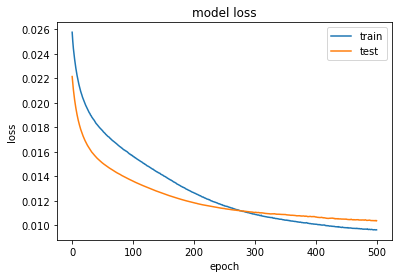

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error
y_pred=model.predict(X_test)
print(f"RMAE:{np.sqrt(mean_absolute_error(y_test,y_pred))}")

RMAE:0.2782112362716264


In [53]:
X_test

array([[0.13676976, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13402062, 1.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26426117, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18556701, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.59237113, 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.23024055, 0.5       , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [54]:
y_pred

array([[0.10429678],
       [0.24261159],
       [0.14223115],
       [0.18251348],
       [0.07599705],
       [0.4524612 ],
       [0.20072016],
       [0.18546402],
       [0.5845592 ],
       [0.19244418],
       [0.2340639 ],
       [0.2816301 ],
       [0.10660044],
       [0.39372495],
       [0.25915858],
       [0.4007374 ],
       [0.43226856],
       [0.16332763],
       [0.4755418 ],
       [0.08650143],
       [0.21317416],
       [0.4248112 ],
       [0.46279243],
       [0.47006413],
       [0.18768391],
       [0.12814745],
       [0.26603222],
       [0.45396778],
       [0.07736264],
       [0.20318568],
       [0.35218352],
       [0.18124476],
       [0.4717931 ],
       [0.08124925],
       [0.1557397 ],
       [0.23263606],
       [0.15731817],
       [0.34718725],
       [0.2051923 ],
       [0.15114632],
       [0.14123476],
       [0.43292406],
       [0.30205533],
       [0.37639952],
       [0.24146909],
       [0.24718642],
       [0.1765295 ],
       [0.306

In [55]:
y_test

array([[0.15151515],
       [0.15151515],
       [0.11939394],
       [0.28424242],
       [0.11818182],
       [0.39393939],
       [0.3030303 ],
       [0.15151515],
       [0.90606061],
       [0.13333333],
       [0.07272727],
       [0.44545455],
       [0.23030303],
       [0.61515152],
       [0.1969697 ],
       [0.42424242],
       [0.37575758],
       [0.17272727],
       [0.36969697],
       [0.16060606],
       [0.04242424],
       [0.59090909],
       [0.41818182],
       [0.57575758],
       [0.14848485],
       [0.21212121],
       [0.21818182],
       [0.57575758],
       [0.0969697 ],
       [0.27333333],
       [0.49090909],
       [0.13939394],
       [0.49090909],
       [0.14545455],
       [0.03030303],
       [0.21212121],
       [0.1030303 ],
       [0.36363636],
       [0.40909091],
       [0.11575758],
       [0.06666667],
       [0.33030303],
       [0.23575758],
       [0.3       ],
       [0.1369697 ],
       [0.14545455],
       [0.21818182],
       [0.2  

In [56]:
from sklearn.metrics import mean_squared_error
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")

RMSE:0.10182259606883787


In [57]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print(f"MAE: {MAE}")

MAE: 0.07740149198778673


In [58]:
from sklearn.metrics import r2_score
R2 = r2_score(y_true=y_test,y_pred=y_pred)
print(f"R2: {R2}")

R2: 0.5598972960063936
